In [1]:
from functools import reduce
import numpy as np
from constants import *
from green_function import *
#import holoviews
from scipy import linalg as sla
import matplotlib as mp
plt.style.use('seaborn')		# Setting the plotting style
mp.rcParams['figure.figsize'] = (20, 10)  # Setting the size of the plots
import numpy.linalg as la 


N = 100

def evolution_operator(hamiltonians, T):
    n = len(hamiltonians)
    exps = [sla.expm(-1j * h * T / n) for h in hamiltonians]
    return reduce(np.matmul, exps)


def calculate_finite_spectrum(periods, hamiltonians):
    energies = []
    for T in periods:
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def calculate_bands(momenta, hamiltonians_k, T):
    energies = []
    for k in momenta:
        hamiltonians = [h_k(k) for h_k in hamiltonians_k]
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.title('Energy Spectrum of Chain with {} Sites'.format(N))
    plt.show()


e_threshold = 1E-6


def check_pi_modes(evals):
    nzmodes = 0
    zmodes_ind = np.where(abs(evals) >= 1-e_threshold)[0]
    return zmodes_ind,len(zmodes_ind)
    

def plot_pi_modes(evals,evecs):

    
    pi_modes_ind,cnt_pi_modes = check_pi_modes(evals)
    if cnt_pi_modes > 0:
        fig,ax = plt.subplots(1,cnt_pi_modes,figsize=(20, 10))
        fig.suptitle('Probability distribution of Pi modes',fontsize=20, fontweight='bold')
        for cnt in range(cnt_pi_modes):
            ax1 = ax[cnt]
            ax1.plot(np.abs(evecs[:,pi_modes_ind[cnt]])**2)
            ax1.set_title('Edge mode {}'.format(cnt+1),fontsize=20)
            ax1.set_xlabel('Site Number',fontsize=20)
            ax1.set_ylabel('$|\psi|^2$',fontsize=20)
            #ax1.text(0.43, 0.95, param_info, transform=ax1.transAxes, fontsize=16,
        #verticalalignment=('top', bbox=dict(boxstyle="square",facecolor="white"))
            ax1.tick_params(axis='both', which='major', labelsize=16)
        #plt.savefig('Edge_modes_Kitaev.pdf')
        plt.show()
print(mp.rcParams['figure.figsize'])

[20.0, 10.0]


In [2]:
def onsite(mu=mu):
    return -mu * s_z


def hopping(t=t, delta=delta):
    return -t * s_z +  1j * delta * s_y

    
print(mp.rcParams['figure.figsize'])

[20.0, 10.0]


In [3]:
periods = np.linspace(0.2 / t, 10 / t, 100)
momenta = np.linspace(-2*np.pi, 2*np.pi,100)

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=t))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=t))


energies = calculate_finite_spectrum(periods, [h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()])
spectrum = np.array([calculate_bands(momenta, [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian], T) for T in periods])

print(mp.rcParams['figure.figsize'])

[20.0, 10.0]


[20.0, 10.0]


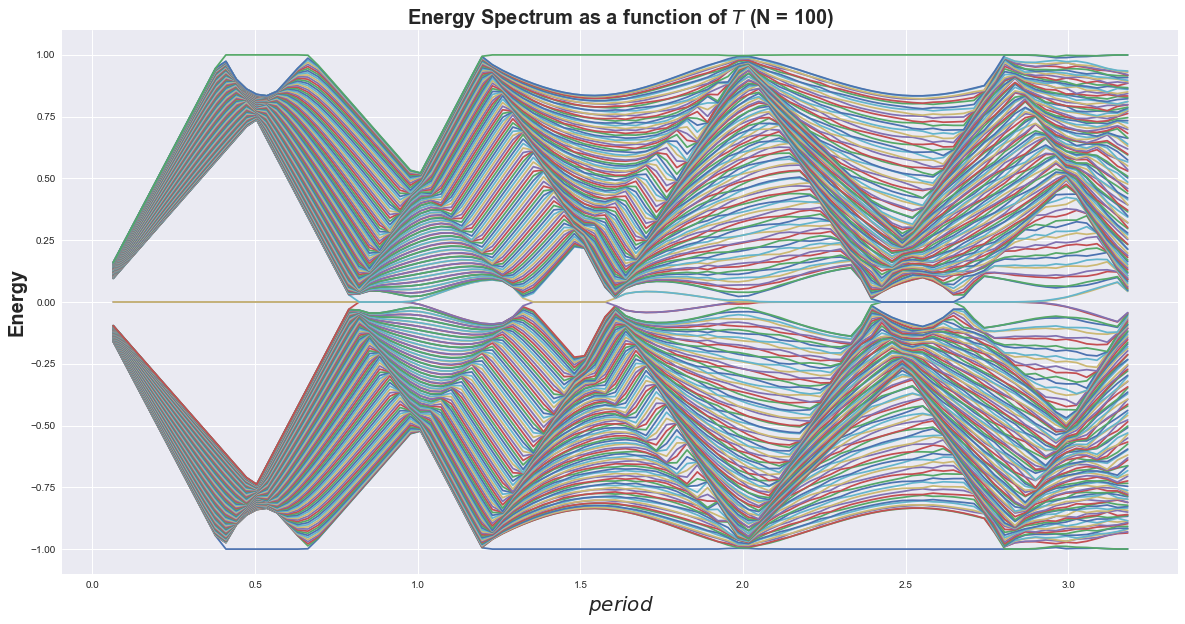

In [6]:
mp.rcParams['figure.figsize'] = (20,10)
plt.title("Energy Spectrum as a function of $T$ (N = {})".format(N),fontsize= 20, fontweight='bold')
for i in range(d*N):
    plt.plot(periods,energies[:,i]/np.pi)
plt.ylabel('Energy',fontsize= 20, fontweight='bold')
plt.xlabel('$period$',fontsize= 20, fontweight='bold')
plt.savefig('spectrum-mu1=0,mu2=t,delta=t,N=100.png')
#plt.show()
print(mp.rcParams['figure.figsize'])

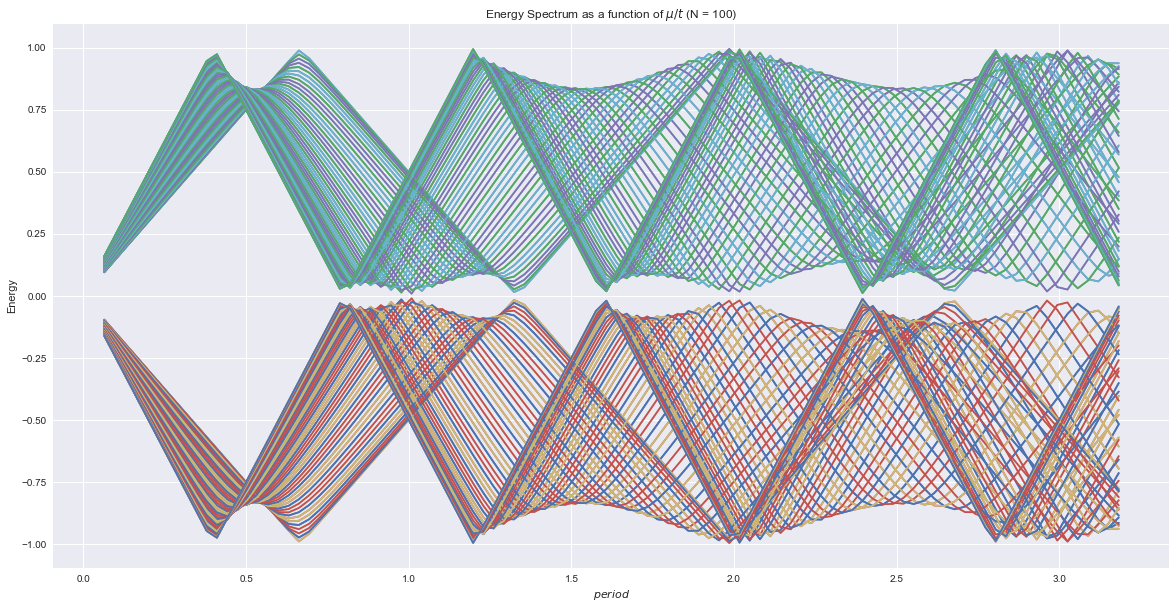

[20.0, 10.0]


In [5]:
mp.rcParams['figure.figsize'] = (20,10)
plt.title("Energy Spectrum as a function of $\mu/t$ (N = {})".format(N))
for i in range(100):
    plt.plot(periods,spectrum[:,i]/np.pi)
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()
#plt.savefig('interesting bulk spectrum.png')

print(mp.rcParams['figure.figsize'])

In [ ]:
Delta = 1.0*t
N = 2000
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=3.1)
h_f = 1j * sla.logm(U)/np.pi

In [ ]:
plot_spectrum(h_f)

In [ ]:
evals,evecs = la.eigh(h_f)
plot_pi_modes(evals,evecs)

In [ ]:
N = 100
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos100 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos100.append(-np.trace(G.imag))


In [ ]:
N = 200
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos200 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos200.append(-np.trace(G.imag))


In [ ]:
N = 300
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos300 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos300.append(-np.trace(G.imag))

In [ ]:
N = 400
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos400 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos400.append(-np.trace(G.imag))

In [ ]:
N = 500
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos500 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos500.append(-np.trace(G.imag))

In [ ]:
plt.title("LDOS of finite Kitaev chain with different number of sites")
plt.plot(var_time,ldos100, label='LDOS, 100 sites')
plt.plot(var_time,ldos200, label='LDOS, 200 sites')
plt.plot(var_time,ldos300, label='LDOS, 300 sites')
plt.plot(var_time,ldos400, label='LDOS, 400 sites')
plt.plot(var_time,ldos500, label='LDOS, 500 sites')

plt.ylabel('Green function')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
N = 100

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))

var_T = np.linspace(0.2 / t, 5 / t, 101)
var_E = np.linspace(-2,2,101)
x, y = np.meshgrid(var_T, var_E)
var_ldos = np.zeros((len(var_T),len(var_E)))
for i in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[i])
    h_f = 1j * sla.logm(U)/np.pi
    for j in range(len(var_E)):
        G = np.array(la.inv((var_E[j]+1j*0.00001)*np.eye(len(h_f))-h_f))
        var_ldos[j,i] = -np.trace(G.imag)





In [ ]:
fig = plt.figure(figsize=(15,20))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(x, y, np.log(abs(var_ldos)),cmap='jet')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('period')
ax.set_ylabel('energy')
plt.show()

In [ ]:
N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_f = []
var_f_0 = []
var_f_pi = []
var_evenf_0 = []
var_evenf_pi = []

for j in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    h_f = 1j * sla.logm(U)/np.pi
    
    G = np.array(la.inv((0.00000000001*1j)*np.eye(len(h_f))-h_f))
    var_f.append( G[0,1].imag)


    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    G_0_even = (G_0_pos + G_0_neg)/2
    var_f_0.append( G_0_odd[0,1].imag)
    var_evenf_0.append( G_0_even[0,1].imag)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd = (G_pi_pos - G_pi_neg)/2
    G_pi_even = (G_pi_pos + G_pi_neg)/2
    var_f_pi.append( G_pi_odd[0,1].imag)
    var_evenf_pi.append( G_pi_even[0,1].imag)





In [ ]:
plt.title("Anomalous Green's function of finite Kitaev chain ")
plt.plot(var_T,var_f)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()
print(delta)

In [ ]:

plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,var_f_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_f_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_evenf_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,var_evenf_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
#np.savez('anomalous-green-function-600sites-delta=t',period=var_T,pair_amplitude_at_zero_energy=var_f,odd_freq_zero_energy=var_f_0,odd_freq_pi_energy=var_f_pi)

In [ ]:
N = 100

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))

var_T = np.linspace(0.2 / t, 5 / t, 101)
var_E = np.linspace(-2,2,101)
x, y = np.meshgrid(var_T, var_E)
f_0_odd = np.zeros((len(var_T),len(var_E)))
f_pi_odd = np.zeros((len(var_T),len(var_E)))
for i in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[i])
    h_f = 1j * sla.logm(U)/np.pi
    for j in range(len(var_E)):

        G_0_pos = np.array(la.inv((var_E[j] - 0.00000000001*1j)*np.eye(len(h_f))-h_f))
        G_0_neg = np.array(la.inv((-var_E[j] -0.00000000001*1j)*np.eye(len(h_f))-h_f))
        G_0_odd = (G_0_pos - G_0_neg)/2
        f_0_odd[j,i] = G_0_odd[0,1].imag





In [18]:
N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
t = np.pi
Delta = t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_oddf = []
var_evenf = []
U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=0.5)
h_f = 1j * sla.logm(U)/np.pi

for j in range(len(var_E)):


    #h_f = h_1.lattice_hamiltonian()
    G_0_pos = np.array(la.inv((var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    G_0_even = (G_0_pos + G_0_neg)/2
    var_oddf.append( G_0_odd[0,1].imag)
    var_evenf.append( -G_0_even[0,1].imag)

    





In [12]:
print(var_E)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


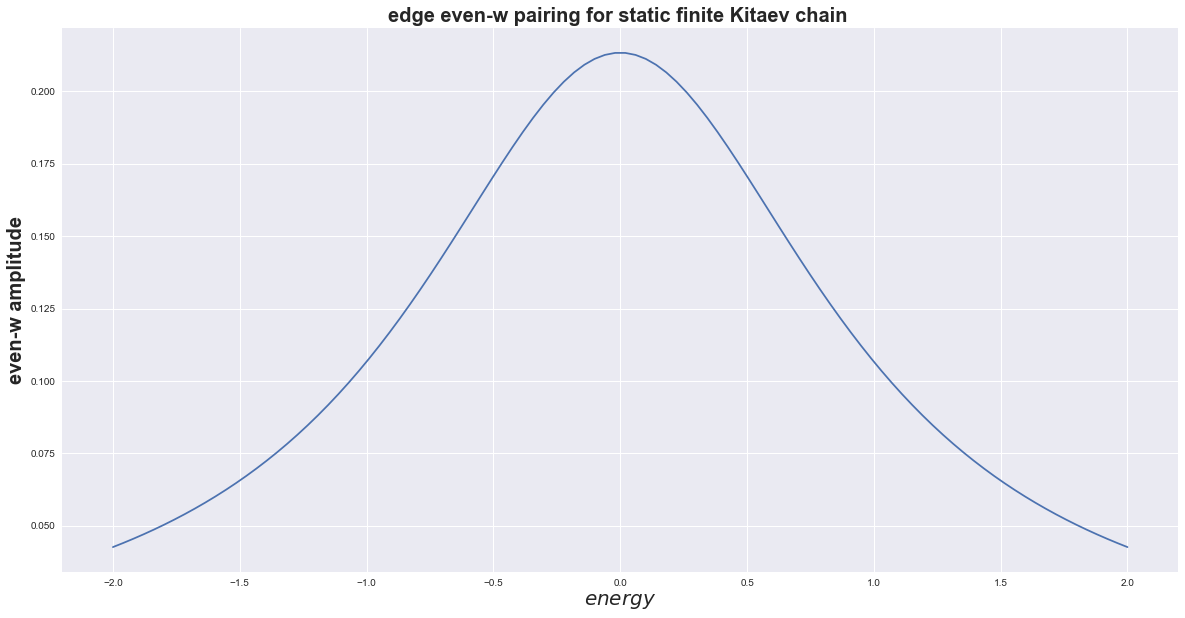

In [20]:
plt.title("edge even-w pairing for static finite Kitaev chain ",fontsize=20, fontweight='bold')
plt.plot(var_E,var_evenf)


plt.ylabel('even-w amplitude',fontsize=20, fontweight='bold')
plt.xlabel('$energy$',fontsize=20, fontweight='bold')
#plt.yscale('log')
plt.legend()
plt.savefig('Matsubara even-w, zero energy-mu1=0,mu2=t,delta=t,N=100,T=0.5.png')
#plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


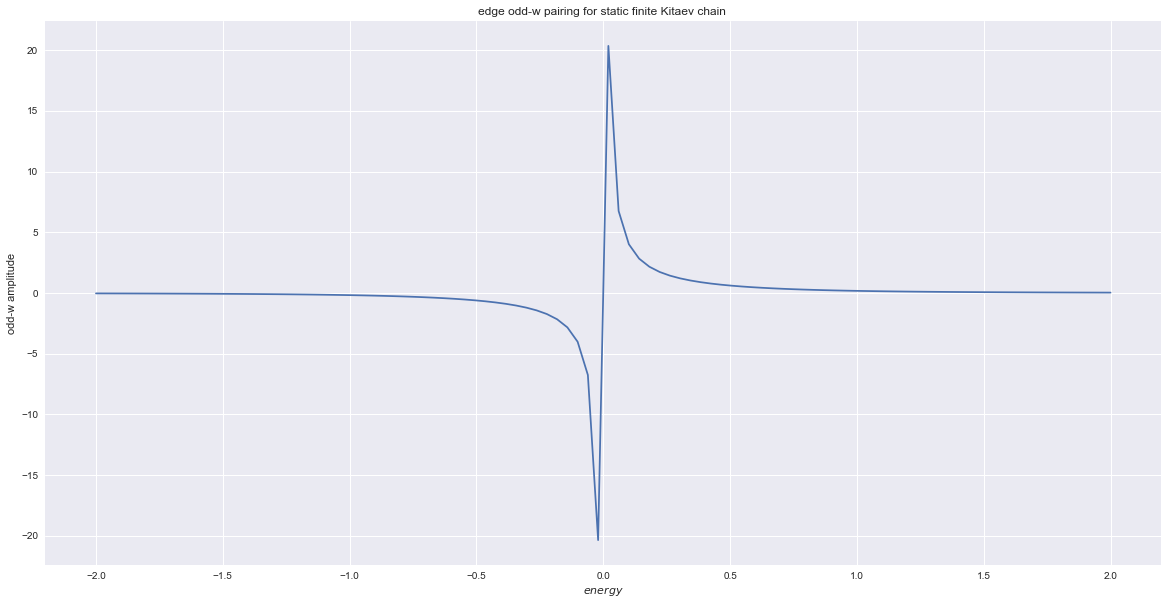

In [14]:
plt.title("edge odd-w pairing for static finite Kitaev chain ")
plt.plot(var_E,var_oddf)


plt.ylabel('odd-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_oddf = []
var_evenf = []

for j in range(len(var_E)):


    h_f = h_1.lattice_hamiltonian()
    G_0_pos = np.array(la.inv((var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    G_0_even = (G_0_pos + G_0_neg)/2
    var_oddf.append( G_0_odd[0,1].imag)
    var_evenf.append( G_0_even[0,1].imag)

    





In [ ]:
plt.title("edge even-w pairing for static finite Kitaev chain ")
plt.plot(var_E,var_evenf)


plt.ylabel('even-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.title("edge odd-w pairing for static finite Kitaev chain ")
plt.plot(var_E,var_oddf)


plt.ylabel('odd-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

In [8]:
N = 100
momenta = np.linspace(-np.pi,np.pi,1000)
trace_cutoff = int(0.5*N)
Delta = t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
chiral_operator = s_x
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
f_bulk_odd = []
f_bulk_even = []
U = [evolution_operator([h_1.k_space_hamiltonian(k), h_2.k_space_hamiltonian(k)],T=0.5) for k in momenta ]
h_f = [1j * sla.logm(U[i])/np.pi for i in range(len(U))]
for j in range(len(var_E)):
    G_pos = [np.array(la.inv((var_E[j]*1j)*np.eye(len(h_f[k]))-h_f[k])) for k in range(len(h_f))]
    G_neg = [np.array(la.inv((-var_E[j]*1j)*np.eye(len(h_f[k]))-h_f[k])) for k in range(len(h_f))]
    G_odd = [(G_pos[k] - G_neg[k])/2 for k in range(len(h_f))]
    G_even = [(G_pos[k] + G_neg[k])/2 for k in range(len(h_f))]
    f_k_odd = [G_odd[k][0,1].imag for k in range(len(h_f))]
    f_k_even = [G_even[k][0,1].imag for k in range(len(h_f))]
    f_bulk_odd.append(sum(f_k_odd))
    f_bulk_even.append(sum(f_k_even))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


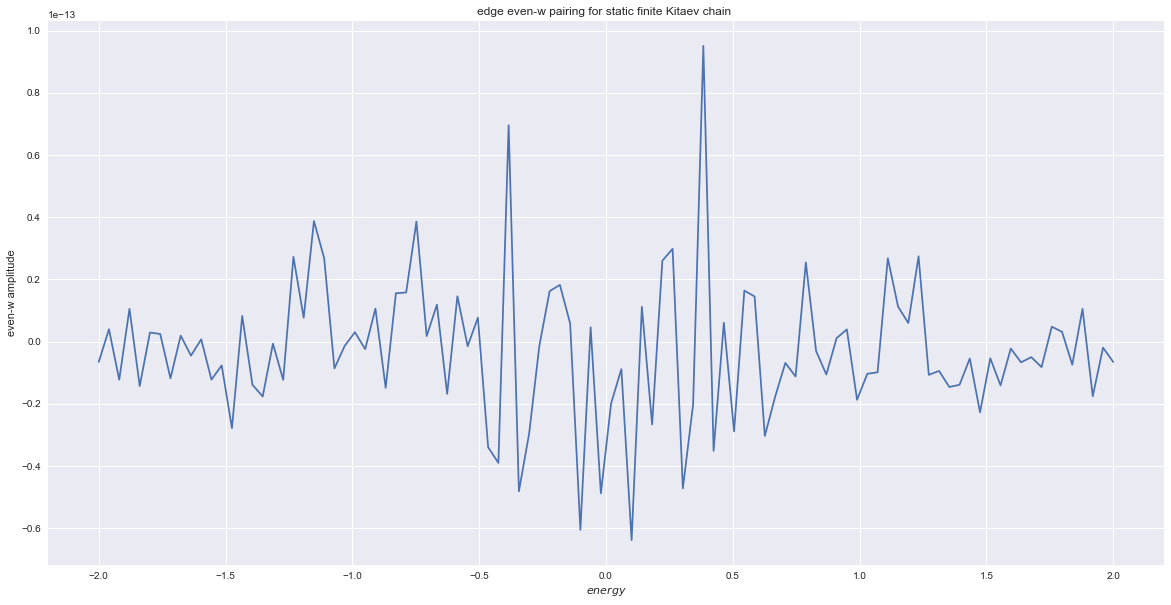

In [9]:
plt.title("edge even-w pairing for static finite Kitaev chain ")
plt.plot(var_E,f_bulk_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


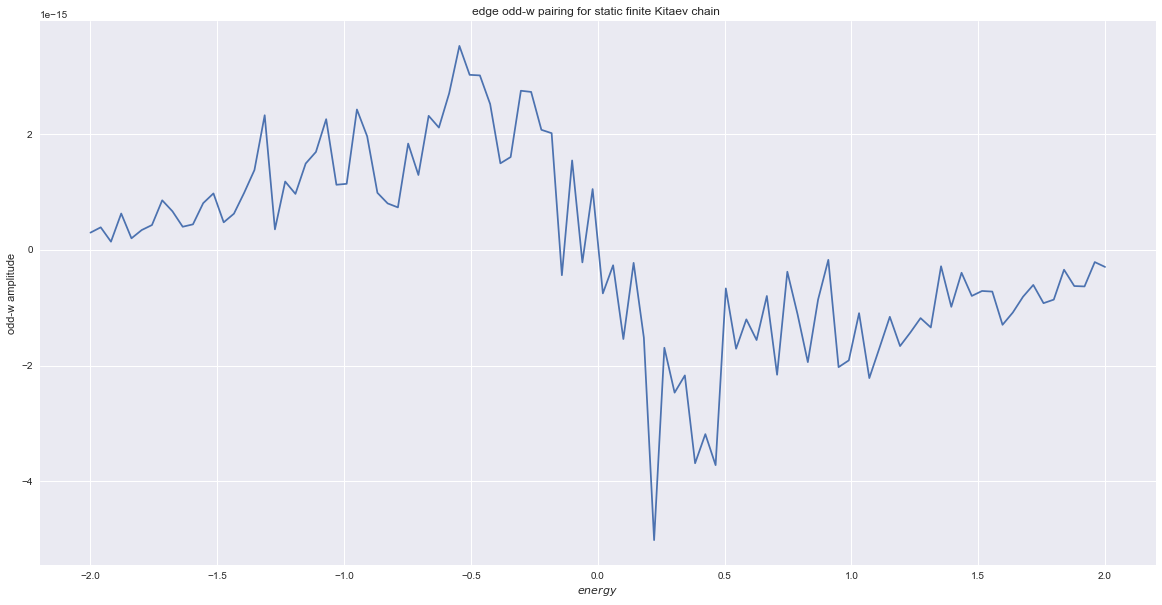

In [10]:
plt.title("edge odd-w pairing for static finite Kitaev chain ")
plt.plot(var_E,f_bulk_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
N = 3
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=0.3)
h_f = 1j * sla.logm(U)/np.pi


In [ ]:
import pandas as pd
df = pd.DataFrame(h_f)
print(df)